In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [7]:
column_names = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
                'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
                'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
                'Normal_Nucleoli', 'Mitoses', 'Class']

df = pd.read_csv('breast-cancer-wisconsin.data', names=column_names)

In [8]:
df.replace('?', np.nan, inplace=True)

In [10]:
df['Bare_Nuclei'].replace('?', np.nan, inplace=True)


In [11]:
df.dropna(subset=['Bare_Nuclei'], inplace=True)

In [12]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

In [13]:
df.drop('Sample_code_number', axis=1, inplace=True)

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
y = y.map({2: 0, 4: 1})

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test_scaled)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9562043795620438
Confusion Matrix:
 [[78  1]
 [ 5 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



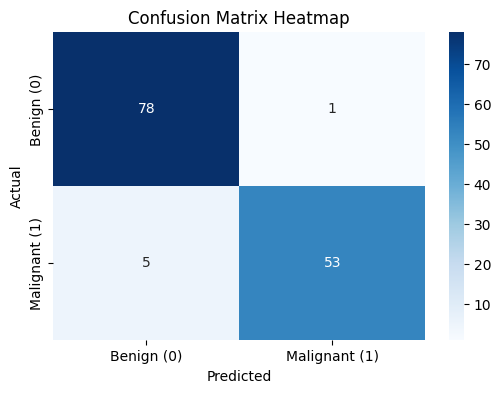

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
